UperNet
===

**Unified Perceptual Parsing for Scene Understanding**

 * Paper: https://arxiv.org/abs/1807.10221

![UperNet Overview](../assets/upernet_overview.png)

In [1]:
from PIL import Image
import torch
from transformers import (
    AutoImageProcessor,
    UperNetForSemanticSegmentation
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
image_processor = AutoImageProcessor.from_pretrained(
    "openmmlab/upernet-convnext-tiny"
)
model = UperNetForSemanticSegmentation.from_pretrained(
    "openmmlab/upernet-convnext-tiny"
).to(device)


/home/pyml/anaconda3/envs/py311/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [3]:
image_path = "../samples/plants.jpg"
image = Image.open(image_path).convert("RGB")

inputs = image_processor(images=image, return_tensors="pt")
inputs = inputs.to(device)

with torch.no_grad():
    outputs = model(**inputs)

logits = outputs.logits
list(logits.shape)

[1, 150, 512, 512]

/tmp/ipykernel_3738/2908501428.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', num_classes)


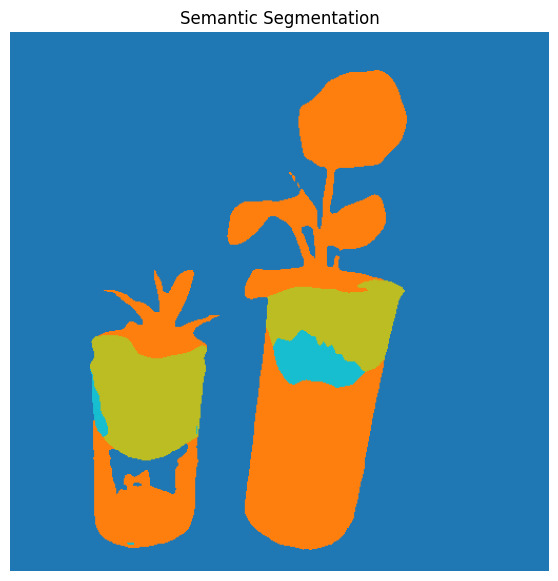

In [6]:
import numpy as np
import matplotlib.pyplot as plt

seg_map = torch.argmax(logits, dim=1).squeeze(0)

seg_map_np = seg_map.cpu().numpy()

# generate a color map
def get_colormap(num_classes=150):
    from matplotlib import cm
    cmap = cm.get_cmap('tab20', num_classes)
    return (cmap(np.arange(num_classes))[:, :3] * 255).astype(np.uint8)

def label_to_color(seg_map, colormap):
    h, w = seg_map.shape
    color_image = np.zeros((h, w, 3), dtype=np.uint8)
    for label in range(len(colormap)):
        color_image[seg_map == label] = colormap[label]
    return color_image

# Generate colored mask
colormap = get_colormap(150)
seg_color = label_to_color(seg_map_np, colormap)

# Step 5: Plot the image
plt.figure(figsize=(7, 7))
plt.imshow(seg_color)
plt.title("Semantic Segmentation")
plt.axis('off')
plt.show()
